# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.121450e+01     7.663817e+00
 * time: 0.004134178161621094
     1     2.865890e+01     5.601031e+00
 * time: 0.011938095092773438
     2     2.298228e+01     7.041106e+00
 * time: 0.030527114868164062
     3     1.417687e+01     2.153484e+00
 * time: 0.052828073501586914
     4     1.334268e+01     3.119974e+00
 * time: 0.06773018836975098
     5     1.300412e+01     2.073614e+00
 * time: 0.08258414268493652
     6     1.167160e+01     1.319317e+00
 * time: 0.09752011299133301
     7     1.098858e+01     1.920135e+00
 * time: 0.11245918273925781
     8     1.036848e+01     1.438052e+00
 * time: 0.12734603881835938
     9     9.975969e+00     9.966531e-01
 * time: 0.1423180103302002
    10     9.738756e+00     6.432638e-01
 * time: 0.15731501579284668
    11     9.549229e+00     5.200792e-01
 * time: 0.1723310947418213
    12     9.490353e+00     7.986949e-01
 * time: 0.1837022304534912
    13     9.429319e+00     5.656729e-01
 * time

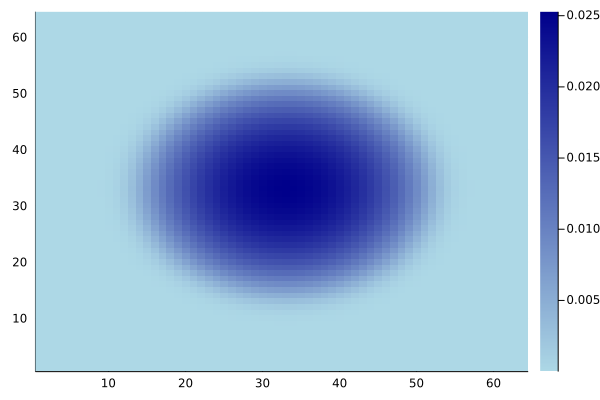

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)